## Mushroom Classification
The goal of this activity is to create a model that predicts whether the mushroom is edible or not

* 1.1 Exploration of Data

In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

In [2]:
df = pd.read_csv('mushrooms.csv')

In [3]:
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='class', ylabel='count'>

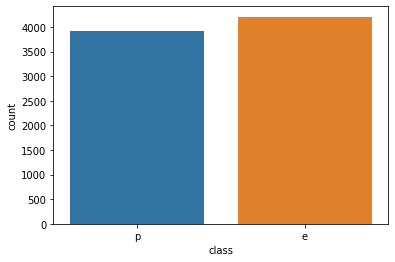

In [10]:
sns.countplot(df['class'])

#### 2. Data Pre-processing

* 2.1. Data Cleaning

* 2.1.1. Drop Duplicates

In [12]:
#check the shape of our data frame
df.shape

(8124, 23)

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(8124, 23)

* 2.1.2. Fill in missing values

In [16]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

We can see that the dataset does not have any missing values in any of its features

* 2.1.3. Removing extreme values

In [17]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

Since we do not have any numerical features, we will skip the "removing of extreme values" step.

* 2.2. Converting categorical features into numerical features

In [18]:
from sklearn.preprocessing import LabelEncoder

In [29]:
encoder = LabelEncoder();
df_new = df.copy();

In [30]:
for col in df_new.columns:
    if(col != 'class'):
        df_new[col] = encoder.fit_transform(df_new[col]);

In [35]:
df_new['class'] = np.where(df_new['class'] == 'p',1,0)

In [37]:
df_new.dtypes

class                       int32
cap-shape                   int32
cap-surface                 int32
cap-color                   int32
bruises                     int32
odor                        int32
gill-attachment             int32
gill-spacing                int32
gill-size                   int32
gill-color                  int32
stalk-shape                 int32
stalk-root                  int32
stalk-surface-above-ring    int32
stalk-surface-below-ring    int32
stalk-color-above-ring      int32
stalk-color-below-ring      int32
veil-type                   int32
veil-color                  int32
ring-number                 int32
ring-type                   int32
spore-print-color           int32
population                  int32
habitat                     int32
dtype: object

* 2.3 Data Normalization / Feature Scaling

In [39]:
from sklearn.preprocessing import MinMaxScaler

df_scaled = df_new.copy();
scaler = MinMaxScaler();

In [41]:
for col in df_scaled.columns:
    if(col != 'class'):
        df_scaled[col] = scaler.fit_transform(df_scaled[col].values.reshape(-1,1));

In [42]:
df_scaled

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,1.0,0.666667,0.444444,1.0,0.750,1.0,0.0,1.0,0.363636,...,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.250,0.6,0.833333
1,0,1.0,0.666667,1.000000,1.0,0.000,1.0,0.0,0.0,0.363636,...,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.375,0.4,0.166667
2,0,0.0,0.666667,0.888889,1.0,0.375,1.0,0.0,0.0,0.454545,...,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.375,0.4,0.500000
3,1,1.0,1.000000,0.888889,1.0,0.750,1.0,0.0,1.0,0.454545,...,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.250,0.6,0.833333
4,0,1.0,0.666667,0.333333,0.0,0.625,1.0,1.0,0.0,0.363636,...,0.666667,0.875,0.875,0.0,0.666667,0.5,0.0,0.375,0.0,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0.6,0.666667,0.444444,0.0,0.625,0.0,0.0,0.0,1.000000,...,0.666667,0.625,0.625,0.0,0.333333,0.5,1.0,0.000,0.2,0.333333
8120,0,1.0,0.666667,0.444444,0.0,0.625,0.0,0.0,0.0,1.000000,...,0.666667,0.625,0.625,0.0,0.000000,0.5,1.0,0.000,0.8,0.333333
8121,0,0.4,0.666667,0.444444,0.0,0.625,0.0,0.0,0.0,0.454545,...,0.666667,0.625,0.625,0.0,0.333333,0.5,1.0,0.000,0.2,0.333333
8122,1,0.6,1.000000,0.444444,0.0,1.000,1.0,0.0,1.0,0.000000,...,0.333333,0.875,0.875,0.0,0.666667,0.5,0.0,0.875,0.8,0.333333


* Feature Selection / Correlation Analysis

<AxesSubplot: >

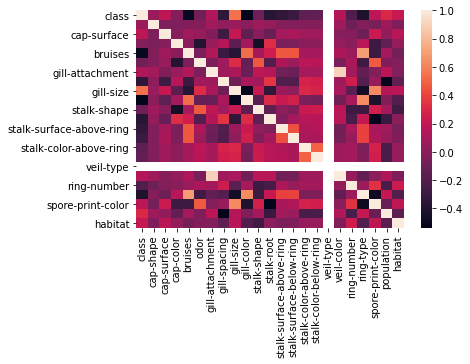

In [44]:
sns.heatmap(df_scaled.corr())

In [46]:
df_scaled = df_scaled.drop(['veil-type'],axis=1)

<AxesSubplot: >

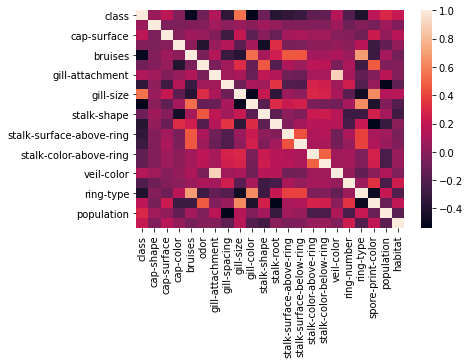

In [47]:
sns.heatmap(df_scaled.corr())

In [49]:
corr = df_scaled.corr();
corr_mask = corr.mask(np.triu(np.ones_like(corr, dtype=bool)))
corr_unstacked = corr_mask.unstack().sort_values(ascending = False);
corr_df = pd.DataFrame(corr_unstacked[abs(corr_unstacked)>.75]).sort_index()

In [50]:
corr_df

,,0
gill-attachment,veil-color,0.897518


In [51]:
#drop gill-attachment to remove any correlation
df_scaled = df_scaled.drop(['gill-attachment'],axis=1)

<AxesSubplot: >

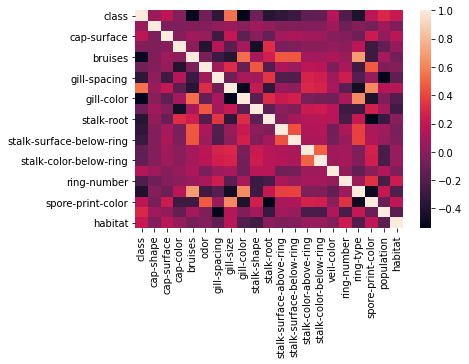

In [52]:
sns.heatmap(df_scaled.corr())

* 3. Modelling

* 3.1. Split target variable to feature variables

In [54]:
X = df_scaled.drop(['class'],axis=1);
y = df_scaled['class'];

* 3.2. Split our dataset to training and test

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,
                                                 train_size=.80,stratify=y);

In [58]:
print(X_train.shape);
print(X_test.shape);

(6499, 20)
(1625, 20)


* 3.3. Choose the best model

In [68]:
from sklearn.metrics import confusion_matrix;
from sklearn.metrics import plot_roc_curve;
from sklearn.metrics import classification_report;

def evaluate_model(model):
    print(classification_report(y_test,model.predict(X_test),
                                target_names=['edible','poisonous']));
    print(confusion_matrix(y_test,model.predict(X_test),
                          labels=[0,1]));
    print('Training score:',model.score(X_train,y_train));
    print('Test score:',model.score(X_test,y_test));
    plot_roc_curve(model,X_test,y_test);



* 3.3.1. Gaussian Naive Bayes

              precision    recall  f1-score   support

      edible       0.91      0.97      0.94       842
   poisonous       0.96      0.90      0.93       783

    accuracy                           0.94      1625
   macro avg       0.94      0.93      0.94      1625
weighted avg       0.94      0.94      0.94      1625

[[814  28]
 [ 77 706]]
Training score: 0.9302969687644252
Test score: 0.9353846153846154


C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


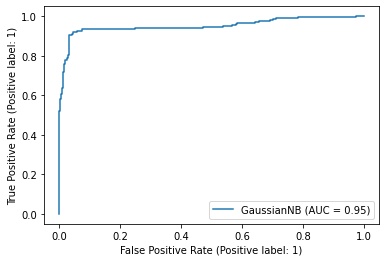

In [69]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB();
gnb.fit(X_train,y_train);

evaluate_model(gnb)

* 3.3.2. BernoulliNB

              precision    recall  f1-score   support

      edible       0.80      0.93      0.86       842
   poisonous       0.91      0.75      0.83       783

    accuracy                           0.85      1625
   macro avg       0.86      0.84      0.84      1625
weighted avg       0.86      0.85      0.85      1625

[[786  56]
 [193 590]]
Training score: 0.8364363748268965
Test score: 0.8467692307692307


C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


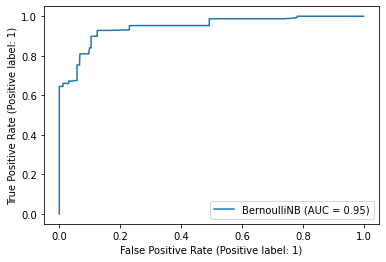

In [70]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB();
bnb.fit(X_train,y_train);

evaluate_model(bnb)

* 3.3.3. Decision Tree Classifier

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       842
   poisonous       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

[[842   0]
 [  0 783]]
Training score: 1.0
Test score: 1.0


C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


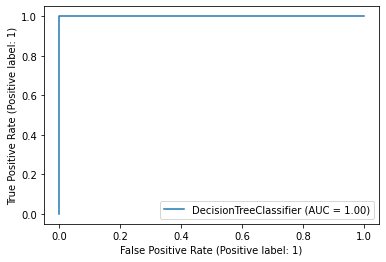

In [71]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier();
dt.fit(X_train,y_train);

evaluate_model(dt)

* 3.3.4. Random Forest Classifier

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       842
   poisonous       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

[[842   0]
 [  0 783]]
Training score: 1.0
Test score: 1.0


C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


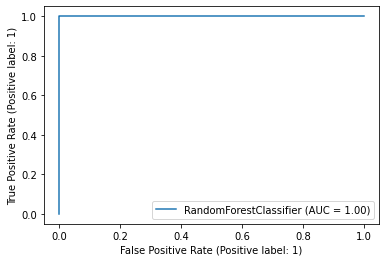

In [72]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier();
rf.fit(X_train,y_train);

evaluate_model(rf)

* 3.3.5. KNN Classifier

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       842
   poisonous       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

[[842   0]
 [  0 783]]
Training score: 1.0
Test score: 1.0


C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


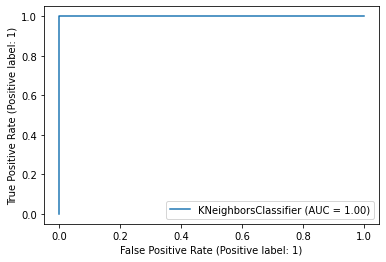

In [73]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier();
knn.fit(X_train,y_train);

evaluate_model(knn)

* 3.3.6. Logistic Regression

              precision    recall  f1-score   support

      edible       0.95      0.96      0.96       842
   poisonous       0.96      0.94      0.95       783

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

[[812  30]
 [ 46 737]]
Training score: 0.9450684720726266
Test score: 0.9532307692307692


C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


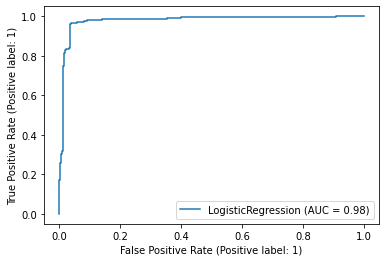

In [74]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression();
lr.fit(X_train,y_train);

evaluate_model(lr)

###### Hyperparameter Tuning / Cross Validation
To tune our model into a better model

In [75]:
from sklearn.model_selection import RandomizedSearchCV

* 4.1.1. Decision Tree Classifier Hyperparameter Tuning

In [77]:
params = {
    'criterion': ['gini','entropy'],
    'splitter': ['best','random'],
    'max_depth': [5,10,15,20]
}

rsearch = RandomizedSearchCV(DecisionTreeClassifier(), params, 
n_iter = 15, cv=10)
rsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=15,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20],
                                        'splitter': ['best', 'random']})

In [79]:
rsearch.best_params_

{'splitter': 'best', 'max_depth': 10, 'criterion': 'gini'}

In [81]:
dt_tuned = DecisionTreeClassifier(
    splitter='best',
    max_depth=10,
    criterion='gini'
);

In [82]:
dt_tuned.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       842
   poisonous       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

[[842   0]
 [  0 783]]
Training score: 1.0
Test score: 1.0


C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


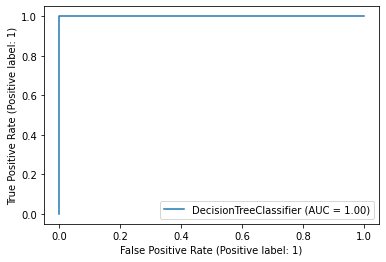

In [83]:
evaluate_model(dt_tuned)

In [85]:
from sklearn.model_selection import cross_val_score;

scores = cross_val_score(dt_tuned, X_train,y_train, cv=20);
scores.mean()

1.0

5. Choosing a model
<br>Since the cross validation score of models who gained 100% accuracy in both training and test dataset is still 100%, we can conclude that the best models for this data is either DecisionTree, Random Forest or KNN Classifier Algorithm.

In [88]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}